In [1]:
import scanpy as sc
import scirpy as ir

from genevector.data import GeneVectorDataset
from genevector.model import GeneVector
from genevector.embedding import GeneEmbedding, CellEmbedding

import tcri

In [2]:
adata = ir.datasets.wu2020_3k()

In [3]:
sc.pp.filter_genes(adata, min_cells=10)
sc.pp.filter_cells(adata, min_genes=100)
sc.pp.highly_variable_genes(adata, flavor="seurat_v3", n_top_genes=1000, subset=True) #works on raw counts

In [4]:
dataset = GeneVectorDataset(adata)

Loading Expression.


100%|██████████| 367580/367580 [00:03<00:00, 113742.17it/s]


Reindexing Cooc


100%|██████████| 3000/3000 [00:00<00:00, 37932.56it/s]


In [5]:
embed = GeneEmbedding("wu2020_3k.vec", dataset,vector="average")
print(embed.compute_similarities("CD8A").head(20))

Loading average of 1st and 2nd weights.


100%|██████████| 1000/1000 [00:00<00:00, 3581813.83it/s]


            Gene  Similarity
0           CD8A    1.000000
1           CD8B    0.873796
2           CTSW    0.744265
3           GZMH    0.743593
4           PRF1    0.703551
5           HOPX    0.689219
6         ZNF683    0.677319
7          PCBP1    0.672641
8         CCL4L1    0.669333
9           NKG7    0.660229
10        PIK3R1    0.652857
11         GSTP1    0.652301
12  LOC101060038    0.650925
13      APOBEC3G    0.641123
14           ID2    0.630459
15       ZFP36L2    0.625061
16          IFNG    0.623185
17         KLRC2    0.620998
18          ENO1    0.620198
19         CALM3    0.616685


In [6]:
cembed = CellEmbedding(dataset, embed)
adata = cembed.get_adata()

100%|██████████| 3000/3000 [00:01<00:00, 1768.74it/s]
OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [7]:
import pandas
markers = cembed.get_predictive_genes(adata,"cluster_orig",n_genes=10)
pandas.DataFrame.from_dict(markers).T

,0,1,2,3,4,5,6,7,8,9
8.2-Tem,NKG7,CCL4L1,CD8A,GZMK,CCL4L2,GZMH,CD8B,CCL3,CST7,GZMB
4.4-FOS,LTB,DNAJB1,ICOS,DUSP1,AQP3,KLF6,PPIF,BTG2,FAAH2,PASK
4.1-Trm,IL21,TNFRSF18,TNFRSF4,LOC101928173,CTLA4,TK1,MCM5,CD82,GEM,HIST1H2BH
8.3c-Trm,GZMH,GZMB,CCL3,CD8B,CD8A,HOPX,PRF1,CTSW,NKG7,ZNF683
4.3-TCF7,LTB,AQP3,PASK,MAL,FAAH2,CCR7,LEF1,MYC,SELL,TNFRSF25
8.1-Teff,GZMH,NKG7,PTGDS,FGFBP2,CCL3,GZMB,PRF1,KLRD1,CD8A,CTSW
3.1-MT,CD8A,CCL3L1,KLRC4,SPON2,FGFBP2,NKG7,CCL4L1,KLRK1,CD8B,KLRD1
4.2-RPL32,ADTRP,LEF1,H1F0,ADAM19,CCR6,FXYD7,ITPRIPL2,NGFRAP1,SDC4,PAICS
8.3b-Trm,KLRC2,KLRD1,ZNF683,CCL3,HOPX,GZMH,CD8A,CCL4L1,CD8B,LOC101060038
8.4-Chrom,IL1B,TOB1,IGLL5,LOC102725018,IL17A,S100A9,AURKB,IL21,MTRNR2L2,S100A8


In [8]:
adata = cembed.phenotype_probability(adata,markers)

100%|██████████| 3000/3000 [00:00<00:00, 84957.11it/s]


8.2-Tem
4.4-FOS
4.1-Trm
8.3c-Trm
4.3-TCF7
8.1-Teff
3.1-MT
4.2-RPL32
8.3b-Trm
8.4-Chrom
4.6a-Treg
8.6-KLRB1
8.3a-Trm
8.5-Mitosis
4.6b-Treg
4.5-IL6ST


/Users/ceglian/miniconda3/lib/python3.9/site-packages/genevector-0.0.1-py3.9.egg/genevector/embedding.py:587: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


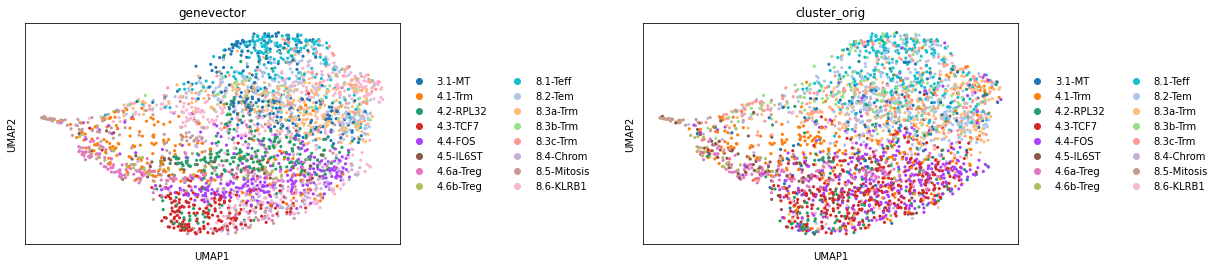

In [11]:
sc.pl.umap(adata,color=["genevector","cluster_orig"],wspace=0.5)

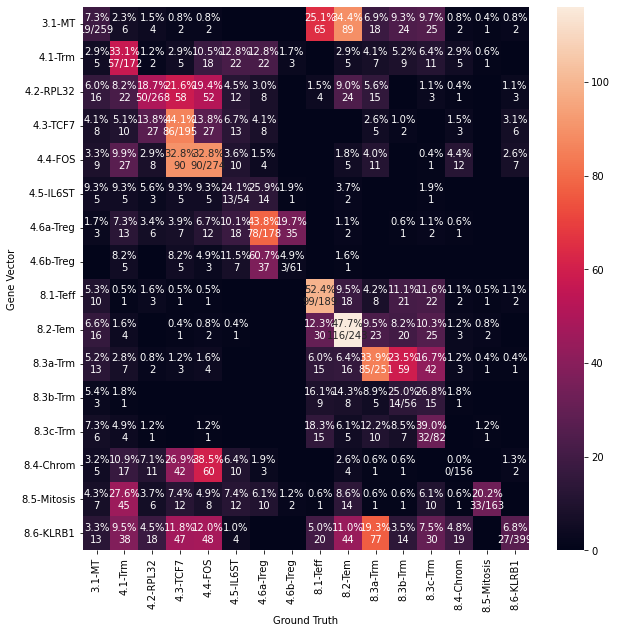

In [12]:
cembed.plot_confusion_matrix(adata,"genevector","cluster_orig")

In [13]:
sample_column="sample"
condition_column="source"
phenotype_column="genevector"

tcri.pp.joint_distribution(adata,
                           sample_column=sample_column, 
                           condition_column=condition_column, 
                           phenotype_column=phenotype_column)

100%|████████████| 87/87 [00:00<00:00, 191.83it/s]


['CASSYQGATEAFF',
 'CASTLTGGLDTEAFF',
 'CASSGGYYNEQFF',
 'CASSIDGPGTSVWSSYNEQFF',
 'CASSPGTSVREQYF',
 'CASSFRGTGELFF',
 'CASSYGLSWGSYEQYF',
 'CASSLASGMNTEAFF',
 'CASSRTGGDSGELFF']

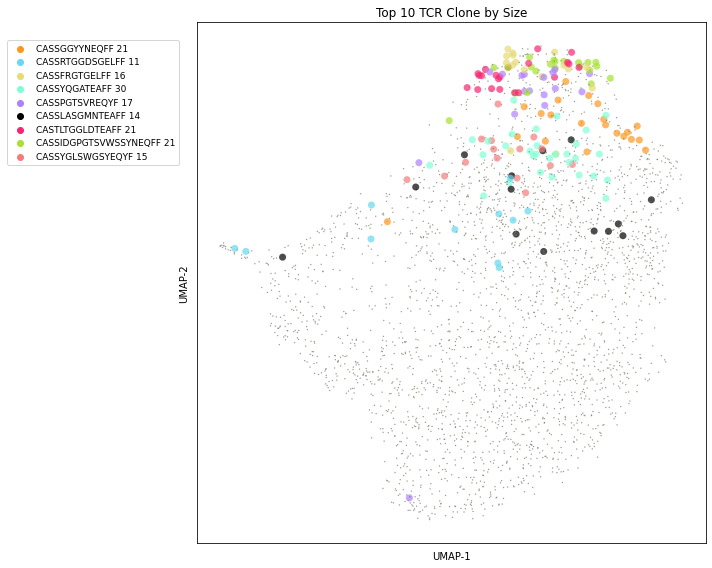

In [14]:
tcri.pl.tcr_umap(adata)

/Users/ceglian/miniconda3/lib/python3.9/site-packages/tcri-0.0.1-py3.9.egg/tcri/metrics/_metrics.py:26: RuntimeWarning: invalid value encountered in double_scalars


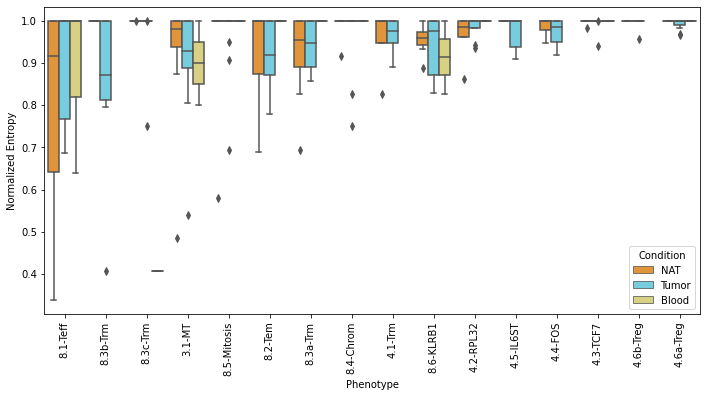

In [16]:
tcri.pl.clonotypic_entropy(adata)

In [19]:
tcri.metrics.phenotypic_flux(adata,from_this="NAT",to_this="Tumor")

100%|██████████| 2194/2194 [00:25<00:00, 85.09it/s] 


,Pre,Post,Phenotype A,Phenotype B
0,0.001396,0.002205,8.3c-Trm,8.3c-Trm
1,0.000698,0.003308,8.3c-Trm,4.5-IL6ST
2,0.000698,0.002756,8.3c-Trm,4.6b-Treg
3,0.000698,0.002756,8.3c-Trm,4.1-Trm
4,0.000698,0.002756,8.3c-Trm,8.3b-Trm
...,...,...,...,...
221,0.002094,0.004410,4.3-TCF7,3.1-MT
222,0.002094,0.003308,4.3-TCF7,4.6a-Treg
223,0.002094,0.002205,4.3-TCF7,4.3-TCF7
224,0.000698,0.001654,8.3b-Trm,8.6-KLRB1


100%|██████████| 2194/2194 [00:24<00:00, 87.94it/s] 


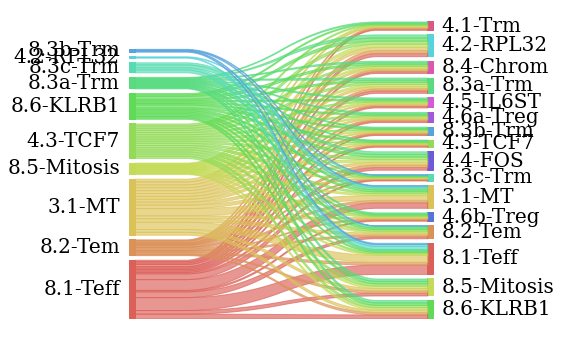

In [ ]:
sc.pl.phenotypic_flux(adata,from_this="NAT",to_this="Tumor")